In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

leveldb = pd.read_csv('../stbench_eval_out/leveldb/stats.csv')
leveldb



,time,state,reads,writes,total,mem
0,1,open,0,15186,15186,0
1,2,open,0,9013,9013,0
2,3,open,0,6629,6629,14629240
3,4,open,0,3791,3791,14265208
4,5,open,0,3034,3034,13901176
...,...,...,...,...,...,...
66,67,running,322,36,357,22545808
67,68,running,302,34,336,22545808
68,69,running,201,22,223,31638784
69,70,running,202,22,224,31638784


In [170]:


states = {}

prevState = ""
for index, row in leveldb.iterrows():
    state = row['state']
    time = row['time']
    if state not in states:
        states[state] = []
    
    stateList = states[state]

    
    # state did not change, just change the end-time of the last item
    if prevState == state:
        stateList[-1][1] = time
    else:
        # state changed, create a new block
        stateList.append([time, time])
        
    prevState = state
    

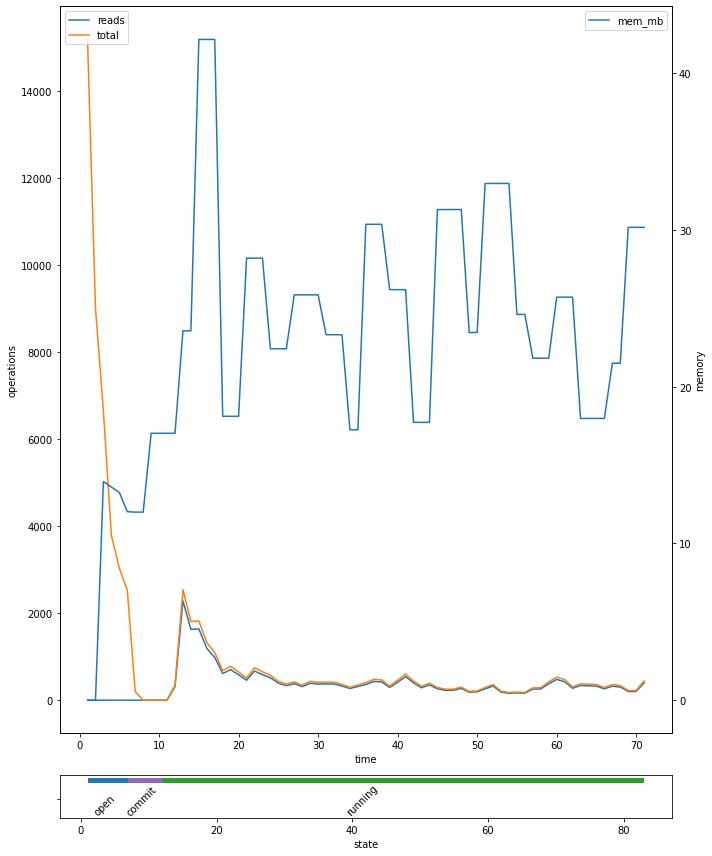

In [177]:
fig, (ax, stateAx) = plt.subplots(2, figsize=(10,12),  gridspec_kw={'height_ratios': [17, 1]})
memAx = ax.twinx()

leveldb['mem_mb'] = leveldb['mem'] / (1024*1024)

colors = {'open':'blue',
          'recover':'orange',
          'prepare':'olive',
          'running':'green',
          'commit':'purple',
          'close':'gray',
         }
         

stateList = [] 
colorList = [] 
stateLabelList = [] 

for state, stateSlots in states.items():
    for s in stateSlots:
        stateList.append(s)
        colorList.append("tab:"+colors.get(state, 'red'))
        stateLabelList.append(state)
       

ax.set_xlabel('time')
ax.set_ylabel('operations')
memAx.set_ylabel('memory')

leveldb.plot(x='time', y=['reads', 'total'], ax=ax)
leveldb.plot(x='time', y='mem_mb', ax=memAx)
ax.legend(loc='upper left')
memAx.legend(loc='upper right')

stateAx.set_ylim(0,16)
stateAx.set_xlabel('state')
stateAx.set_yticks([7])
stateAx.set_yticklabels([])
stateAx.broken_barh(stateList, [13,2], facecolors=colorList)

fig.tight_layout()

for i, state  in enumerate(stateList):
    stateAx.text(x=state[0] + (state[1]-state[0])/2.0, ha="center", y=1, rotation=45, s=stateLabelList[i])
